# Predict Credit Card Default

### Objective of this Capstone Project is to predict the likelihood of credit card default in Taiwan.
### Dataset are acquired from: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients 
### By identifying customers who are likely to default, this will allow the Business Manger to be able to 
### execute a programme to help the customers to better manage their Financial Spending.

## Library Imports

In [1]:
# Import Numpy for numeric computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Import RandomForestClassifier algorithm from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Import GradientBoostingClassifier algorithm from sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# StandardScaler
from sklearn.preprocessing import StandardScaler

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# Classification Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

## Exploratory Analysis

In [106]:
# Import Dataset
df = pd.read_excel('default of credit card clients.xls', index_col=0)

In [3]:
# How many observations and features does your dataset have?
df.shape

(30000, 24)

In [4]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [6]:
df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

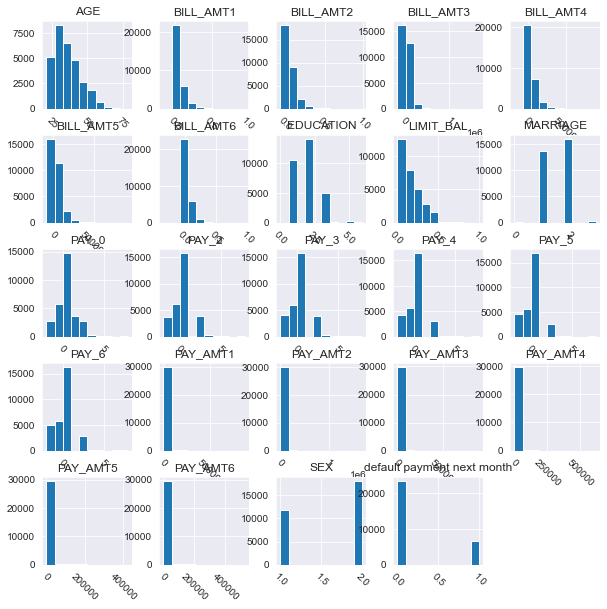

In [7]:
# Check distribution of numeric features
df.hist(figsize=(10,10), xrot=-45)
plt.show()

In [8]:
# Summary Statistics of numeric features
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
df['default payment next month'].head()

ID
1    1
2    1
3    0
4    0
5    0
Name: default payment next month, dtype: int64

In [108]:
df['default'] = df['default payment next month'].astype('int64') 

In [109]:
df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
default                       int64
dtype: object

In [110]:
df['sex'] = df.SEX.astype('object')
df['education'] = df.EDUCATION.astype('object')
df['marriage'] = df.MARRIAGE.astype('object')
df['pay_0'] = df.PAY_0.astype('object')
df['pay_2'] = df.PAY_2.astype('object')
df['pay_3'] = df.PAY_3.astype('object')
df['pay_4'] = df.PAY_4.astype('object')
df['pay_5'] = df.PAY_5.astype('object')
df['pay_6'] = df.PAY_6.astype('object')

In [111]:
credit_txn_df = df.drop(['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default payment next month'], axis=1)

In [112]:
credit_txn_df.dtypes

LIMIT_BAL     int64
AGE           int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
default       int64
sex          object
education    object
marriage     object
pay_0        object
pay_2        object
pay_3        object
pay_4        object
pay_5        object
pay_6        object
dtype: object

In [113]:
# Summary statistics of categorical features
credit_txn_df.describe(include=['object'])

,sex,education,marriage,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
count,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,2,7,4,11,11,11,11,10,10
top,2,2,2,0,0,0,0,0,0
freq,18112,14030,15964,14737,15730,15764,16455,16947,16286


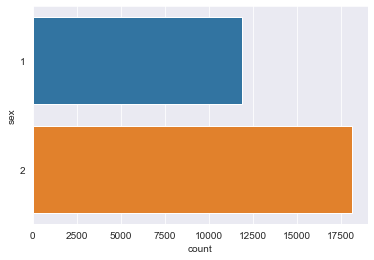

In [114]:
# Distribution of categorical features
# 1 = male; 2 = female
sns.countplot(y='sex', data=credit_txn_df)
plt.show()

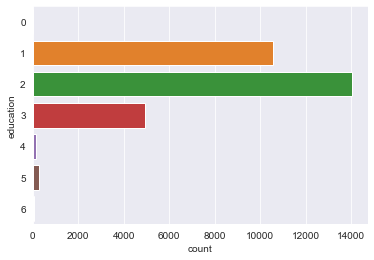

In [63]:
# Distribution of categorical features
# 1 = graduate school; 2 = university; 3 = high school; 4 = others
sns.countplot(y='education', data=credit_txn_df)
plt.show()

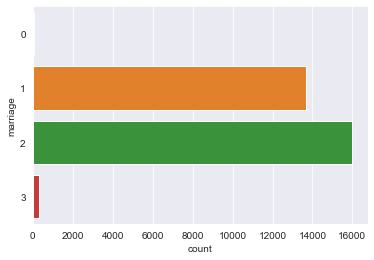

In [18]:
# Distribution of categorical features
# 1 = married; 2 = single; 3 = others
sns.countplot(y='marriage', data=credit_txn_df)
plt.show()

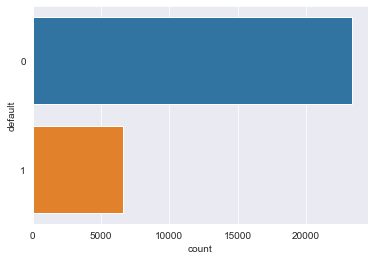

In [19]:
# Distribution of Target
sns.countplot(y='default', data=credit_txn_df)
plt.show()

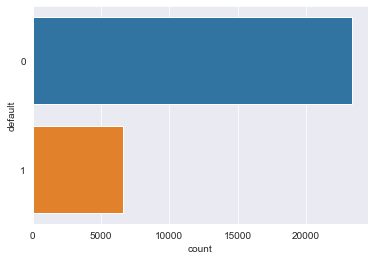

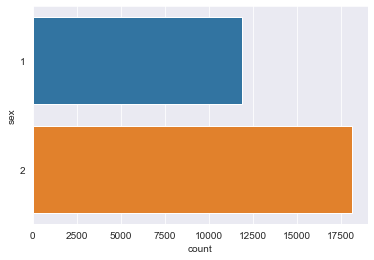

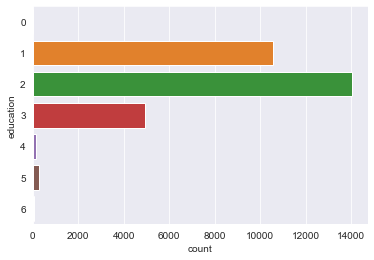

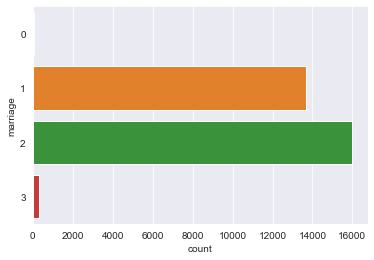

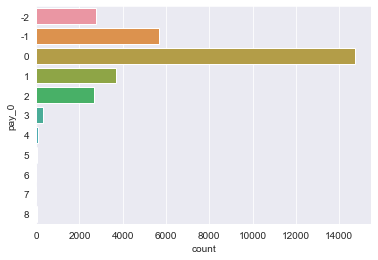

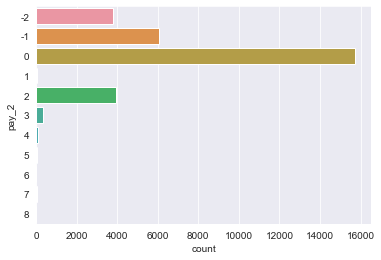

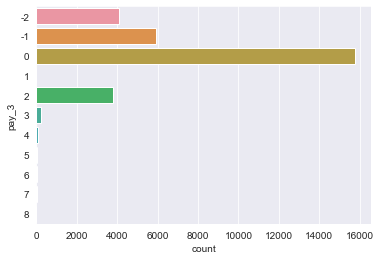

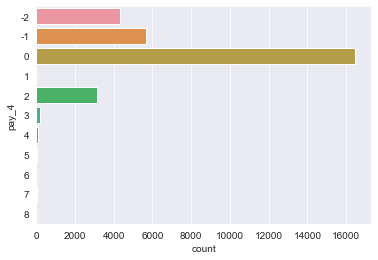

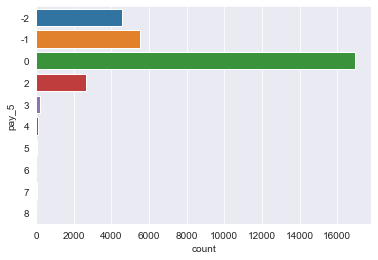

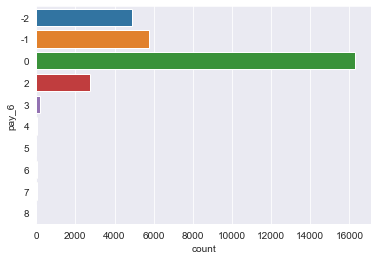

In [26]:
# Plot Bar plot for each categorical feature
# Observe if there are sparse classes
for feature in credit_txn_df.dtypes[credit_txn_df.dtypes == 'object'].index:
    sns.countplot(y=feature, data=credit_txn_df)
    plt.show()

In [20]:
# Segmentation
# Segment key numeric by target variable
credit_txn_df.groupby('default').mean()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default,,,,,,,,,,,,,,
0,178099.726074,35.417266,51994.227273,49717.435670,47533.365605,43611.165254,40530.445343,39042.268704,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,130109.656420,35.725738,48509.162297,47283.617842,45181.598855,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


In [27]:
credit_txn_df.groupby('default').describe()

LIMIT_BAL                                                            \
            count           mean            std      min      25%       50%   
default                                                                       
0         23364.0  178099.726074  131628.359660  10000.0  70000.0  150000.0   
1          6636.0  130109.656420  115378.540571  10000.0  50000.0   90000.0   

                                  AGE                                         \
              75%        max    count       mean       std   min   25%   50%   
default                                                                        
0        250000.0  1000000.0  23364.0  35.417266  9.077355  21.0  28.0  34.0   
1        200000.0   740000.0   6636.0  35.725738  9.693438  21.0  28.0  34.0   

                    BILL_AMT1                                                 \
          75%   max     count          mean           std       min      25%   
default                                                                        
0        41.0  79.0   23364.0  51994.227273  73577.606694 -165580.0  3677.25   
1        42.0  75.0    6636.0  48509.162297  73782.067220   -6676.0  2987.75   

                                    BILL_AMT2                              \
             50%      75%       max     count          mean           std   
default                                                                     
0        23119.5  69027.0  964511.0   23364.0  49717.435670  71029.946709   
1        20185.0  59626.5  613860.0    6636.0  47283.617842  71651.030364   

                                                      BILL_AMT3                \
             min     25%      50%       75%       max     count          mean   
default                                                                         
0       -69777.0  3055.0  21660.5  65686.00  983931.0   23364.0  47533.365605   
1       -17710.0  2694.0  20300.5  57919.75  581775.0    6636.0  45181.598855   

                                                                        \
                  std       min      25%      50%       75%        max   
default                                                                  
0        69576.661008 -157264.0  2769.75  20202.5  61894.00  1664089.0   
1        68516.975738  -61506.0  2500.00  19834.5  54733.75   578971.0   

        BILL_AMT4                                                         \
            count          mean           std       min     25%      50%   
default                                                                    
0         23364.0  43611.165254  64324.796730 -170000.0  2360.0  19000.0   
1          6636.0  42036.950573  64351.076092  -65167.0  2141.5  19119.5   

                            BILL_AMT5                ... BILL_AMT6            \
              75%       max     count          mean  ...       75%       max   
default                                              ...                       
0        55988.00  891586.0   23364.0  40530.445343  ...   49842.5  961664.0   
1        50175.75  548020.0    6636.0  39540.190476  ...   47424.0  514975.0   

        PAY_AMT1                                                            \
           count         mean           std  min      25%     50%      75%   
default                                                                      
0        23364.0  6307.337357  18014.508990  0.0  1163.75  2459.5  5606.25   
1         6636.0  3397.044153   9544.252427  0.0     0.00  1636.0  3478.25   

                  PAY_AMT2                                                  \
              max    count         mean           std  min     25%     50%   
default                                                                      
0        873552.0  23364.0  6640.465074  25302.263601  0.0  1005.0  2247.5   
1        300000.0   6636.0  3388.649638  11737.986064  0.0     0.0  1533.5   

                            PAY_AMT3                                         \
    

## Data Cleaning

In [115]:
# Adhoc Alterations
credit_txn_df.education.replace([0,5,6], 4, inplace=True)

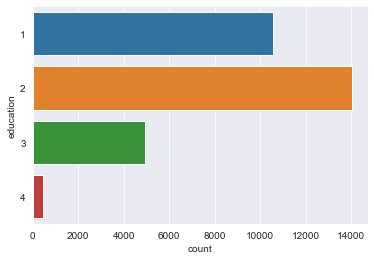

In [75]:
sns.countplot(y='education', data=credit_txn_df)
plt.show()

In [116]:
credit_txn_df.marriage.replace(0, 3, inplace=True)

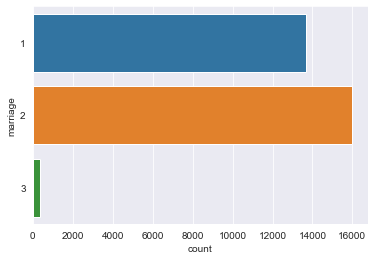

In [77]:
sns.countplot(y='marriage', data=credit_txn_df)
plt.show()

In [117]:
credit_txn_df.pay_0.replace([-2,-1,0], 0, inplace=True)
credit_txn_df.pay_2.replace([-2,-1,0], 0, inplace=True)
credit_txn_df.pay_3.replace([-2,-1,0], 0, inplace=True)
credit_txn_df.pay_4.replace([-2,-1,0], 0, inplace=True)
credit_txn_df.pay_5.replace([-2,-1,0], 0, inplace=True)
credit_txn_df.pay_6.replace([-2,-1,0], 0, inplace=True)

In [83]:
# Display number of missing values by features
credit_txn_df.isnull().sum()

LIMIT_BAL    0
AGE          0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
sex          0
education    0
marriage     0
pay_0        0
pay_2        0
pay_3        0
pay_4        0
pay_5        0
pay_6        0
dtype: int64

## Feature Engineering

In [118]:
abt = pd.get_dummies(credit_txn_df, columns=['sex', 'education', 'marriage', 
                                             'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'])

In [85]:
abt.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,sex_1,sex_2,education_1,education_2,education_3,education_4,marriage_1,marriage_2,marriage_3,pay_0_0,pay_0_1,pay_0_2,pay_0_3,pay_0_4,pay_0_5,pay_0_6,pay_0_7,pay_0_8,pay_2_0,pay_2_1,pay_2_2,pay_2_3,pay_2_4,pay_2_5,pay_2_6,pay_2_7,pay_2_8,pay_3_0,pay_3_1,pay_3_2,pay_3_3,pay_3_4,pay_3_5,pay_3_6,pay_3_7,pay_3_8,pay_4_0,pay_4_1,pay_4_2,pay_4_3,pay_4_4,pay_4_5,pay_4_6,pay_4_7,pay_4_8,pay_5_0,pay_5_2,pay_5_3,pay_5_4,pay_5_5,pay_5_6,pay_5_7,pay_5_8,pay_6_0,pay_6_2,pay_6_3,pay_6_4,pay_6_5,pay_6_6,pay_6_7,pay_6_8
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [119]:
abt.to_csv('analytical_base_table.csv', index=None)

## Algorithm Selection & Model Training

In [120]:
# Input Features
X = abt.drop('default', axis=1)

# Target Variable
y = abt.default

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=1234,
                                                   stratify=abt.default)

print( len(X_train), len(X_test), len(y_train), len(y_test) )

24000 6000 24000 6000


In [122]:
# pipeline dictionary
pipelines = {
    'l1' : make_pipeline(StandardScaler(), 
                         LogisticRegression(solver='liblinear', penalty='l1', random_state=123)),
    'l2' : make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=123)),
    'rf' : make_pipeline(StandardScaler(),
                        RandomForestClassifier(random_state=123)),
    'gb' : make_pipeline(StandardScaler(),
                        GradientBoostingClassifier(random_state=123))
}

In [100]:
# Logistic Regression Hyperparameters
l1_hyperparameters = {
    'logisticregression__C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
}

l2_hyperparameters = {
    'logisticregression__C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
}

In [123]:
# Random Forest Hyperparameters
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf': [1, 3, 5, 10]
}

In [124]:
# Gradient Boosting Hyperparameters
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

In [125]:
# Create hyperparameters dictionary
hyperparameters = {
    'l1': l1_hyperparameters,
    'l2': l2_hyperparameters,
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters
}

In [126]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipelines and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train and y_train
    model.fit(X_train, y_train)
    
    # Score models in fitted_models(name)
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

l1 has been fitted.
l2 has been fitted.
rf has been fitted.
gb has been fitted.


In [127]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print( name, model.best_score_)

l1 0.8203750000000001
l2 0.8199583333333333
rf 0.8205416666666666
gb 0.8218333333333334


In [128]:
for name, model in fitted_models.items():
    pred = model.predict_proba(X_test)
    pred = [p[1] for p in pred]
    
    print( name, roc_auc_score(y_test, pred) )

l1 0.7575672008915879
l2 0.7623069466548601
rf 0.7783556259878335
gb 0.7805425062864142


In [129]:
# Predict class probabilities using L1 Regularised Logistic Regression
pred = fitted_models['gb'].predict_proba(X_test)

# Get just the prediction for the positive class (1)
pred = [p[1] for p in pred]

# Display first 10 predictions
print( np.round(pred[:10],2) )

[0.28 0.1  0.6  0.15 0.1  0.24 0.12 0.69 0.26 0.16]


In [130]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, pred)

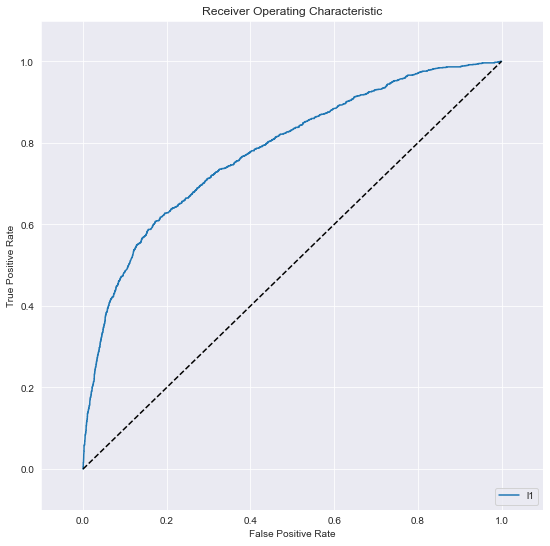

In [131]:
# Initialize figure
fig = plt.figure(figsize=(9,9))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Insights & Analysis

### Gradient Boosting is the winning model